In [2]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

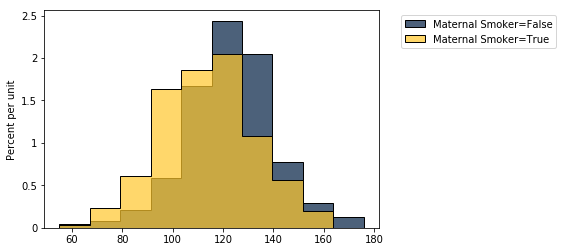

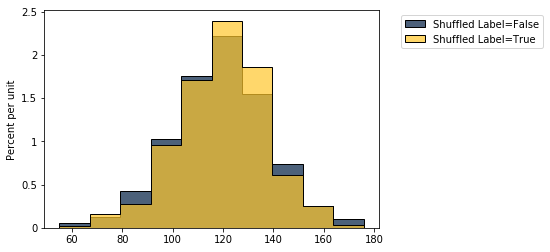

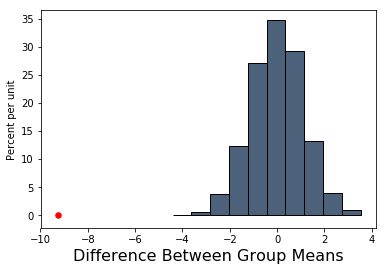

In [6]:
# 12.1 A/B Testing
baby = Table().read_table('baby.csv')
baby.group('Maternal Smoker')
baby.hist('Birth Weight', group='Maternal Smoker')
smoking_and_birthweight = baby.select('Birth Weight', 'Maternal Smoker')
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
observed_difference = means_table.column(1).item(1) - means_table.column(1).item(0)

sample_data = smoking_and_birthweight.with_column(
    'Shuffled Label', smoking_and_birthweight.sample(with_replacement=False).column(1)
)

sample_data.hist('Birth Weight', group='Shuffled Label')
sample_means_table =  sample_data.group('Shuffled Label', np.average)
difference = sample_means_table.column(1).item(1) - sample_means_table.column(1).item(0)
difference

result = []
for i in np.arange(5000):
    sample_data = smoking_and_birthweight.with_column(
        'Shuffled Label', smoking_and_birthweight.sample(with_replacement=False).column(1)
    )

    #sample_data.hist('Birth Weight', group='Shuffled Label')
    sample_means_table =  sample_data.group('Shuffled Label', np.average)
    difference = sample_means_table.column(1).item(1) - sample_means_table.column(1).item(0)
    result.append(difference)

result_table = Table().with_column('Difference Between Group Means', result)
result_table.hist()
plt.scatter(observed_difference, 0, color='red', s=30)

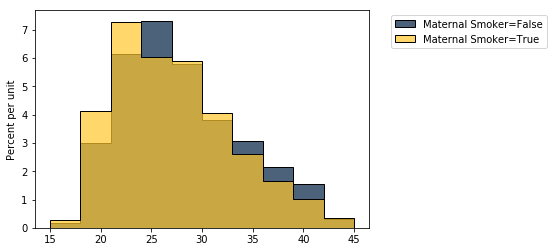

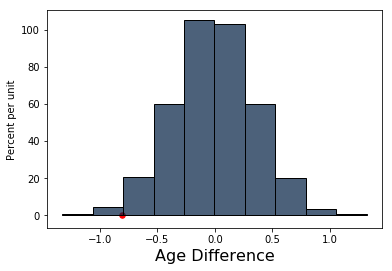

In [19]:
# 11.1 Age and Maternal Smoker
baby_age_data = baby.select('Maternal Age', 'Maternal Smoker')
baby_age_data.hist('Maternal Age', group='Maternal Smoker')
age_means_table = baby_age_data.group('Maternal Smoker', np.average)
age_observed_difference = age_means_table.column(1).item(1) - age_means_table.column(1).item(0)
age_observed_difference


age_sample_data = baby_age_data.with_column('Shuffled Label', baby_age_data.sample(with_replacement=True).column(1))
age_sample_means_table = age_sample_data.group('Shuffled Label', np.average)
age_sample_difference = age_sample_means_table.column(1).item(1) - age_sample_means_table.column(1).item(0)
age_sample_difference


age_difference_result = []
for i in np.arange(5000):
    age_sample_data = baby_age_data.with_column('Shuffled Label', baby_age_data.sample(with_replacement=True).column(1))
    age_sample_means_table = age_sample_data.group('Shuffled Label', np.average)
    age_sample_difference = age_sample_means_table.column(1).item(1) - age_sample_means_table.column(1).item(0)
    age_difference_result.append(age_sample_difference)
    
age_result_table = Table().with_columns('Age Difference', age_difference_result)
age_result_table.hist('Age Difference')
plt.scatter(age_observed_difference, 0, color='red', s=30)

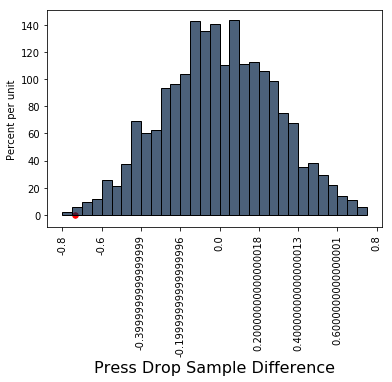

In [69]:
# 12.2 Deflategate

football = Table().read_table('football.csv')

football = football.with_columns(
    'Mean Pressure', (football.column('Blakeman')+football.column('Prioleau'))/2
)
start = np.append(np.ones(11) * 12.5, np.ones(4) * 13)
football = football.with_columns(
    'Pressure Drop', start - football.column('Mean Pressure')
)
football = football.drop('Ball', 'Blakeman', 'Prioleau', 'Mean Pressure')
#football.show()

observed_means = football.group('Team', np.average)
observed_difference = observed_means.column(1).item(1) - observed_means.column(1).item(0)
observed_difference

football = football.with_columns(
    'Pressure Drop Sample', football.sample(with_replacement=False).column(1)
)
sample_means = football.group('Team', np.average)
sample_difference = sample_means.column(2).item(1) - sample_means.column(2).item(0)
sample_difference

result = []
for i in np.arange(10000):
    sample_table = football.with_columns(
        'Pressure Drop Sample', football.sample(with_replacement=False).column(1)
    )
    sample_means = sample_table.group('Team', np.average)
    difference = sample_means.column(2).item(1) - sample_means.column(2).item(0)
    result.append(difference)

result_table = Table().with_columns('Press Drop Sample Difference', result)
result_table.hist(bins=np.arange(-0.8, 0.8, 0.05))
plt.scatter(observed_difference, 0, color='red', s=30)

In [70]:
# 12.3 Causality
bta = Table().read_table('bta.csv')
bta

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
